# Project on Random Forest and Decision Tree

In this project I'll be making two models using Random Forest and Decision Tree algorithms and try to which one performs better.

Sor this project I'll be using a dataset called `california_housing` from sklearn.

> California Housing dataset is a real world dataset about the California housing market. It contains 20,640 observations of 9 features and 1 target variable.

I chose this dataset so that you can experiment and get a feel for how Random Forest and Decision Tree algorithms work.

So let's get started.

- **Import Libraries(pandas, numpy, matplotlib, seaborn)**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**You can import the california_housing dataset from sklearn using the following code:**

In [17]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
data = california.frame

- **Check the data information**

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- **Check the data head**

In [19]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In this data set there are 20640 observations of 9 features.

- `MedInc` is Median of Household Income.
- `HouseAge` is Median House Age.
- `AveRooms` is Average Number of Rooms.
- `AveBedrms` is Average Number of Bedrooms.
- `Population` is Population.
- `AveOccup` is Average Number people in Household.
- `Latitude` is Latitude.
- `Longitude` is Longitude.
- `MedHouseVal` is Median House Value.

All the features are continuous and the target variable is `MedHouseVal`.

So, let's do some exploratory data analysis.

# Exploratory Data Analysis

As I said before this is a real world dataset so we can just mode on to making the model but still suppose you don't know anything about the data, so how can you understand that the data is genuine or not?

There is a nice clue in this data set.

There are two columns called `Latitude` and `Longitude` which are the coordinates of the location of the house.

Other features can be randomly generated but `Latitude` and `Longitude` cannot be. If it is then if we make a scatter plot of `Latitude` and `Longitude` we can clearly see that these two columns are completely random.

So, first let's make a scatter plot of `Latitude` and `Longitude` to see if they are random.

<Axes: xlabel='Longitude', ylabel='Latitude'>

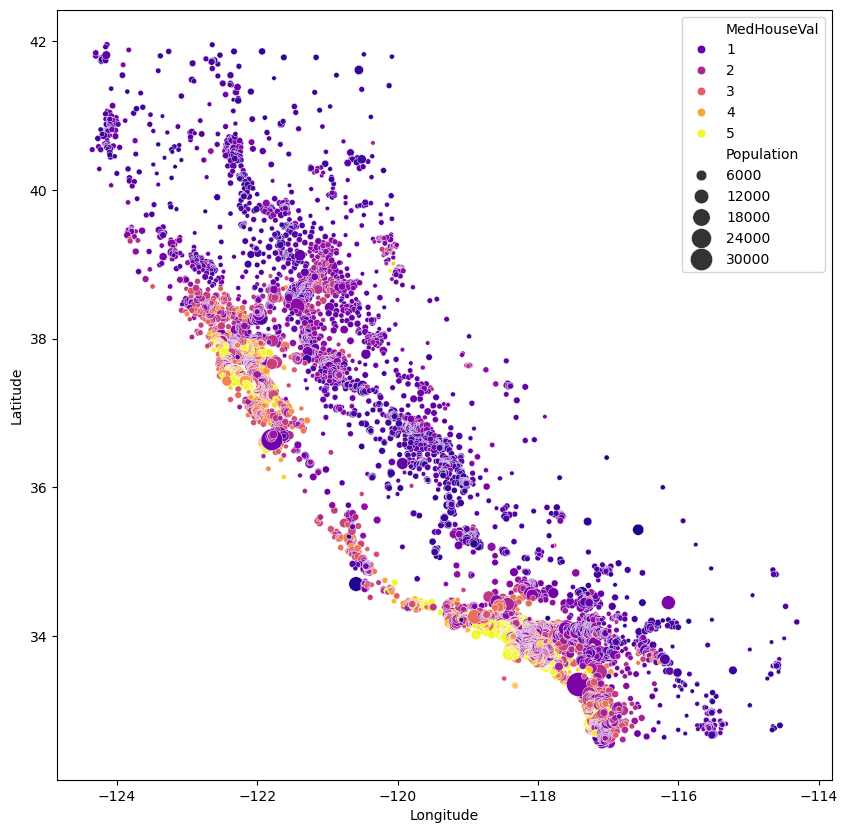

In [20]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    x="Longitude",
    y="Latitude",
    hue="MedHouseVal",
    palette="plasma",
    data=data,
    size="Population",
    sizes=(10, 300)
)

Ummm! This looks promising. But not that great so `let's try to plot the data on a map.`

This is a little advanced and will need some more extra libraries.

- `Geopandas` for working with geospatial data.
- `Contextily` for adding basemaps.
- `Shapely` for working with geometries.
- `Pyproj` for working with projections.

You can install them all at once using the following command:

```bash
pip install geopandas contextily shapely pyproj   
```

All of these libraries work together to plot the data on a map.

So, in the following code, I will plot a scatterplot with the house location and house price and with the population density on the map.

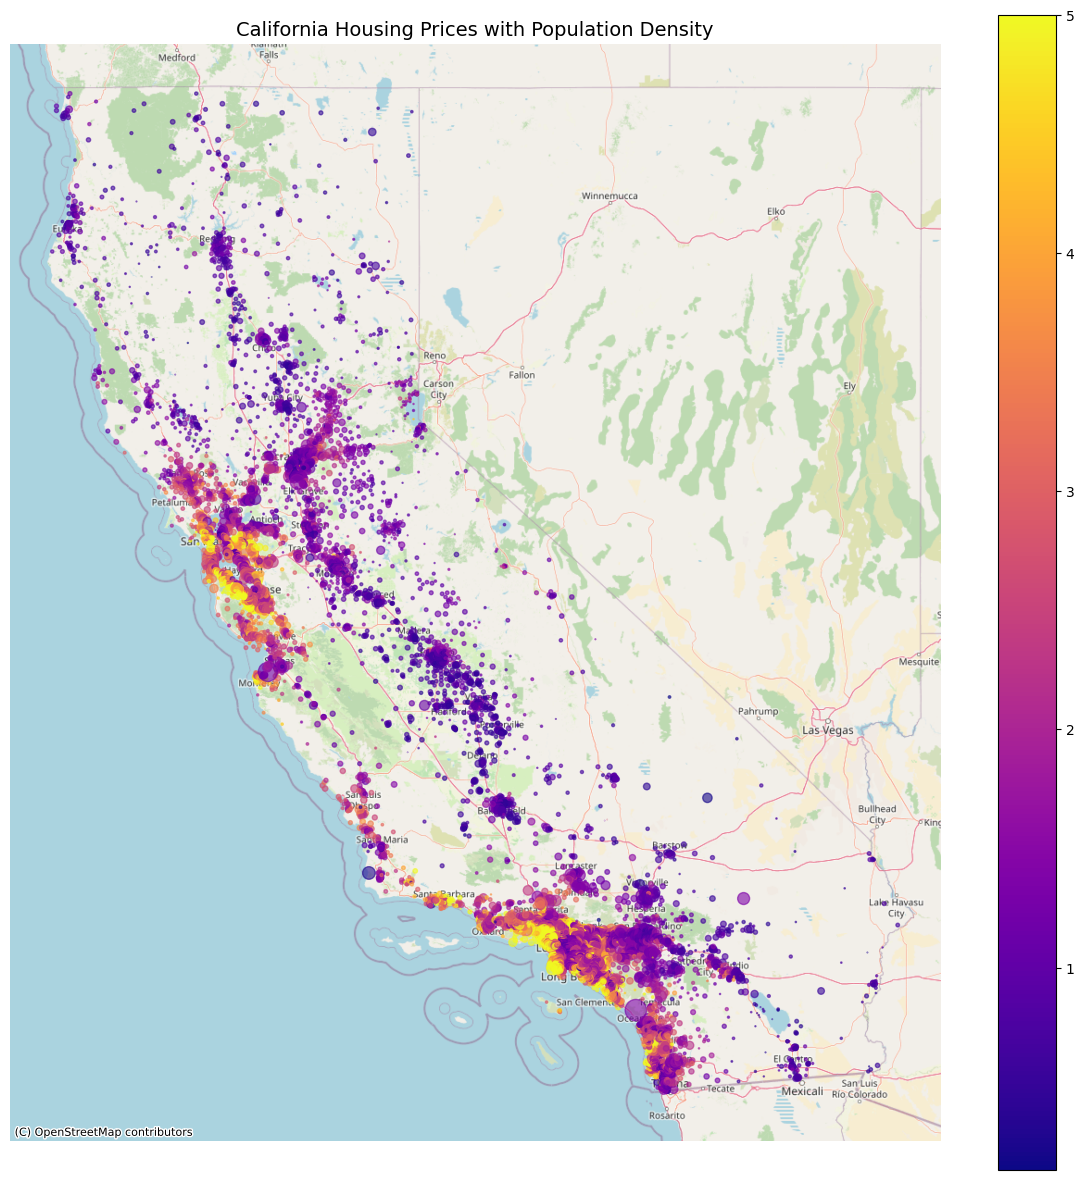

In [21]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.Longitude, data.Latitude),
    crs="EPSG:4326"  # WGS84 (GPS coordinate system)
)

import contextily as ctx

gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15))

gdf.plot(
    ax=ax,
    column="MedHouseVal",
    cmap="plasma",
    markersize=gdf["Population"] / 150,
    alpha=0.6,
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
ax.set_title("California Housing Prices with Population Density", fontsize=14)

plt.show()

Now, I'll try my best to explain whats happening here with the help `AI`(chat gpt bois, I use it too!)

Absolutely! Let’s go **line by line** and conceptually break down what your code does. I’ll also point out a subtle issue I notice in your code.

** Import GeoPandas**

```python
import geopandas as gpd
```

* `geopandas` is an extension of pandas designed to handle **geospatial data**.
* It allows you to work with points, lines, polygons, and perform spatial operations like overlays, joins, and plotting on maps.

**Create a GeoDataFrame**

```python
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.Longitude, data.Latitude),
    crs="EPSG:4326"  # WGS84 (GPS coordinate system)
)
```

* `data` is presumably a **pandas DataFrame** with at least `Longitude`, `Latitude`, `MedHouseVal`, and `Population` columns.
* `gpd.points_from_xy(data.Longitude, data.Latitude)` converts your **longitude and latitude columns** into a `geometry` column of **Point objects**. This is what makes it geospatial.
* `crs="EPSG:4326"` sets the **coordinate reference system (CRS)**.

  * `EPSG:4326` = WGS84, which is the standard GPS coordinate system using **degrees of latitude and longitude**.
  * Important for geospatial calculations and plotting on base maps.

> **At this point:** You have a GeoDataFrame `gdf` with your original data + a geometry column representing each location as a point.


** Import Plotting Libraries**

```python
import matplotlib.pyplot as plt
import contextily as ctx
```

* `matplotlib.pyplot` is the standard Python plotting library.
* `contextily` lets you **add background map tiles** (like OpenStreetMap) under your plot. This is very handy for contextualizing points on real-world maps.

** Transform CRS**

```python
gdf = gdf.to_crs(epsg=3857)
```

* `to_crs()` **reprojects the GeoDataFrame** into a different coordinate system.
*  **EPSG:3857** (Web Mercator), which is compatible with web map tiles (like OpenStreetMap, Google Maps).
* Why reproject?

  * Base maps in `contextily` usually expect **Web Mercator** coordinates.
  * Reprojecting ensures your points **align correctly** with the base map tiles.

**Create a Figure**

```python
fig, ax = plt.subplots(figsize=(15, 15))
```

* Creates a **matplotlib figure** with a single axes object.
* `figsize=(15, 15)` makes a large square figure — useful when plotting many points or a big map.

### **6️⃣ Plot GeoDataFrame**

```python
gdf.plot(
    ax=ax,
    column="MedHouseVal",
    cmap="plasma",
    markersize=gdf["Population"] / 150,
    alpha=0.6,
    legend=True
)
```

Here’s what each argument does:

1. **`ax=ax`**

   * Plots on the axes we created, instead of a new one.

2. **`column="MedHouseVal"`**

   * Colors the points based on the median house value.
   * `matplotlib` automatically scales the colors according to the data in this column.

3. **`cmap="plasma"`**

   * Chooses the color scheme (plasma is a gradient from dark purple → yellow).
   * Brighter colors usually indicate higher values.

4. **`markersize=gdf["Population"] / 150`**

   * The size of each point corresponds to the population.
   * Dividing by 150 is just to **scale down the sizes** to make them visually reasonable.
   * This way, bigger populations are shown as larger points on the map.

5. **`alpha=0.6`**

   * Sets **transparency** so overlapping points don’t obscure each other completely.

6. **`legend=True`**

   * Adds a legend for the `MedHouseVal` coloring.

> **Result:** You now have a scatter plot over the map where:
>
> * Point **color** = median house value
> * Point **size** = population
> * Transparency lets overlapping points be visible

** Add a Basemap**

```python
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
```

* `contextily` adds a **raster map** from OpenStreetMap below your points.
* `source=ctx.providers.OpenStreetMap.Mapnik` specifies which tile provider to use.
* This allows you to **see actual geographic context** (like roads, rivers, cities).

> **Important:** The CRS must be Web Mercator (`EPSG:3857`) for the tiles to align correctly.

**Remove Axis and Add Title**

```python
ax.set_axis_off()
ax.set_title("California Housing Prices with Population Density", fontsize=14)
```

* `ax.set_axis_off()` hides the axis ticks and labels because they’re not very meaningful on maps.
* `ax.set_title()` gives the plot a descriptive title.


**Show Plot**

```python
plt.show()
```

* Renders the plot.

- These are the general steps:

1. Converts a normal DataFrame of California housing data into a **geospatial GeoDataFrame**.
2. Creates points for each location based on longitude/latitude.
3. Colors points by **median house value** and scales size by **population**.
4. Projects points to Web Mercator CRS for map tile compatibility.
5. Plots points on a **realistic map** using OpenStreetMap tiles.
6. Adds transparency and a legend to make the plot readable.
7. Titles the map and hides unnecessary axes.


In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('MedHouseVal',axis=1)
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.7425790610305028
0.5297035782972663


Now let's see how well the features correlate with the target variable.

<Axes: >

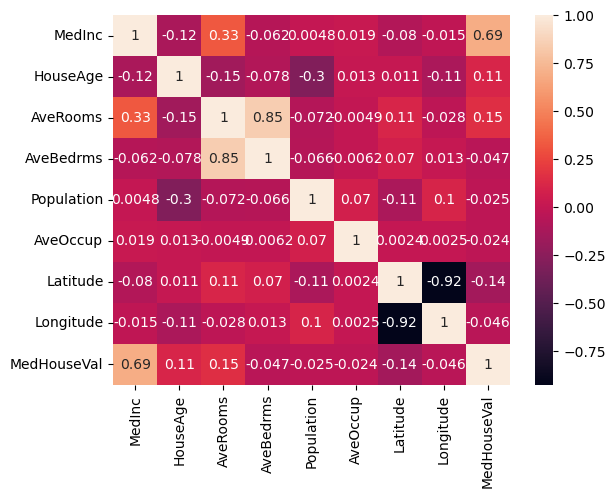

In [23]:
sns.heatmap(data.corr(), annot=True)

Well, there are clearly some features that are more predictive than others, but from the heatmap it's clear that the `target` is heavily correlated with `MedInc(median income)` features and losely correlated with `HouseAge(average house age)` and `AveRooms(average number of rooms per dwelling)` other features are negetively correlated with `target`.

Let's see the distribution of the `MedInc` feature.

<Axes: xlabel='MedInc', ylabel='Count'>

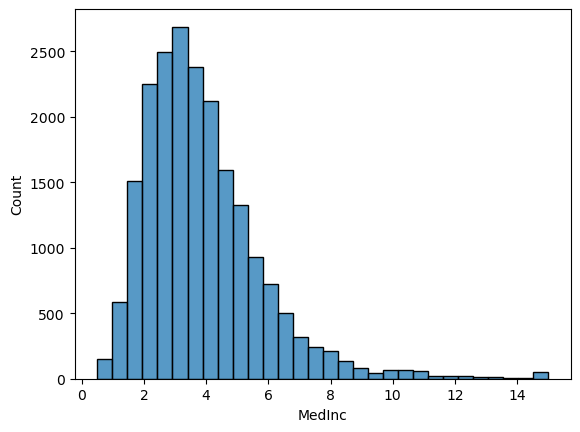

In [24]:
sns.histplot(data=data, x='MedInc', bins=30)

Hmmmmmm, interesting. It's a left skewed distribution. Houses with high median income are more likely to have a higher median house value.

Let's see these two features together.

<Axes: xlabel='MedInc', ylabel='Count'>

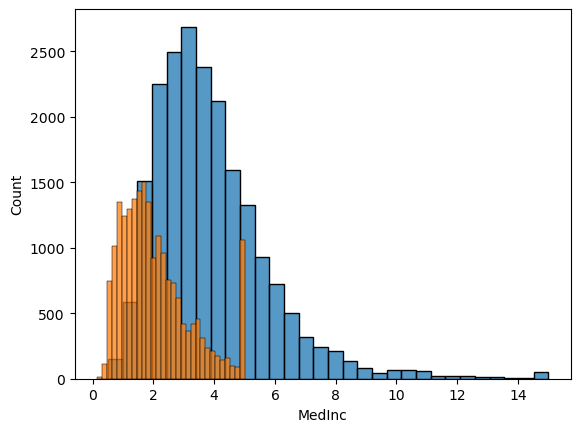

In [25]:
sns.histplot(data=data, x='MedInc', bins=30)
sns.histplot(data=data, x='MedHouseVal', bins=30)

That's even more interesting. This is kinda hard to explain but I'll try my best.

The histogram of `MedInc` shows that most areas fall within a moderate income range, with fewer regions earning very high incomes. The `MedHouseVal` distribution, however, has a noticeable tall bar at the upper end. At first glance, this may look like an anomaly, but it actually reflects a real characteristic of the dataset. In the California housing data, house prices are capped at a maximum value, so many high-priced areas end up sharing the same value. Since higher income regions are more likely to afford expensive houses, these observations naturally accumulate near the upper limit. This creates a spike in the histogram, not because of bad data, but because of how the dataset represents high-value homes.

> There is a cap on the median house value. As the values are in normal floating point like `1.5` or `2.3` this actually referes to `1.5*100,000` or `2.3*100,000` which is the actual value. And the limit is set to `500,000` so any value higher than `500,000` is capped to `500,000`. This is another reason why we are seeing the spike in the histogram.

So, we learned some interesting information of the data and let's now make a model.

> Your task is analyze all the features of the data.

- Splitting the data into training and testing sets.

In [26]:
from sklearn.model_selection import train_test_split

feature = data.drop(columns=['MedHouseVal'])
target = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.30, random_state=101)

- Now we will train decision tree model and random forest model.

To see the performance of the model we will use `rmse` because we are working with regression problem.

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

Predictions are done so let's check the performance of the model.

In [28]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

print('Root mean squared error of decision tree regressor is:')
print(root_mean_squared_error(y_test,predictions))

Root mean squared error of decision tree regressor is:
0.7390875893426521


We have the performance of the model now let's see the performance of the random forest model.

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print('Root mean squared error of random forest regressor is:')
print(root_mean_squared_error(y_test,predictions))

Root mean squared error of random forest regressor is:
0.5292370161102483


Ow wow! way better. So, this means the `random forest` model is handling the outliers way better than the `decision tree` model.

> Check out the `mean_absolute_error` or `variance` of both the models and also cross validate the models. Write down the reason why you think one model is better than the other.

# Great Job!